In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import spacy
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os
from PIL import Image
import torchvision.transforms as transforms

In [3]:
spacy_eng = spacy.load("en_core_web_sm")

In [31]:
images_dir = "../datasets/PCCD/images/full"
captions_file = "../datasets/PCCD/raw.csv"
freq_threshold = 5

In [32]:

df = pd.read_csv(captions_file)

In [24]:
i = Image.open(os.path.join(images_dir, df["title"][1])).convert("RGB")

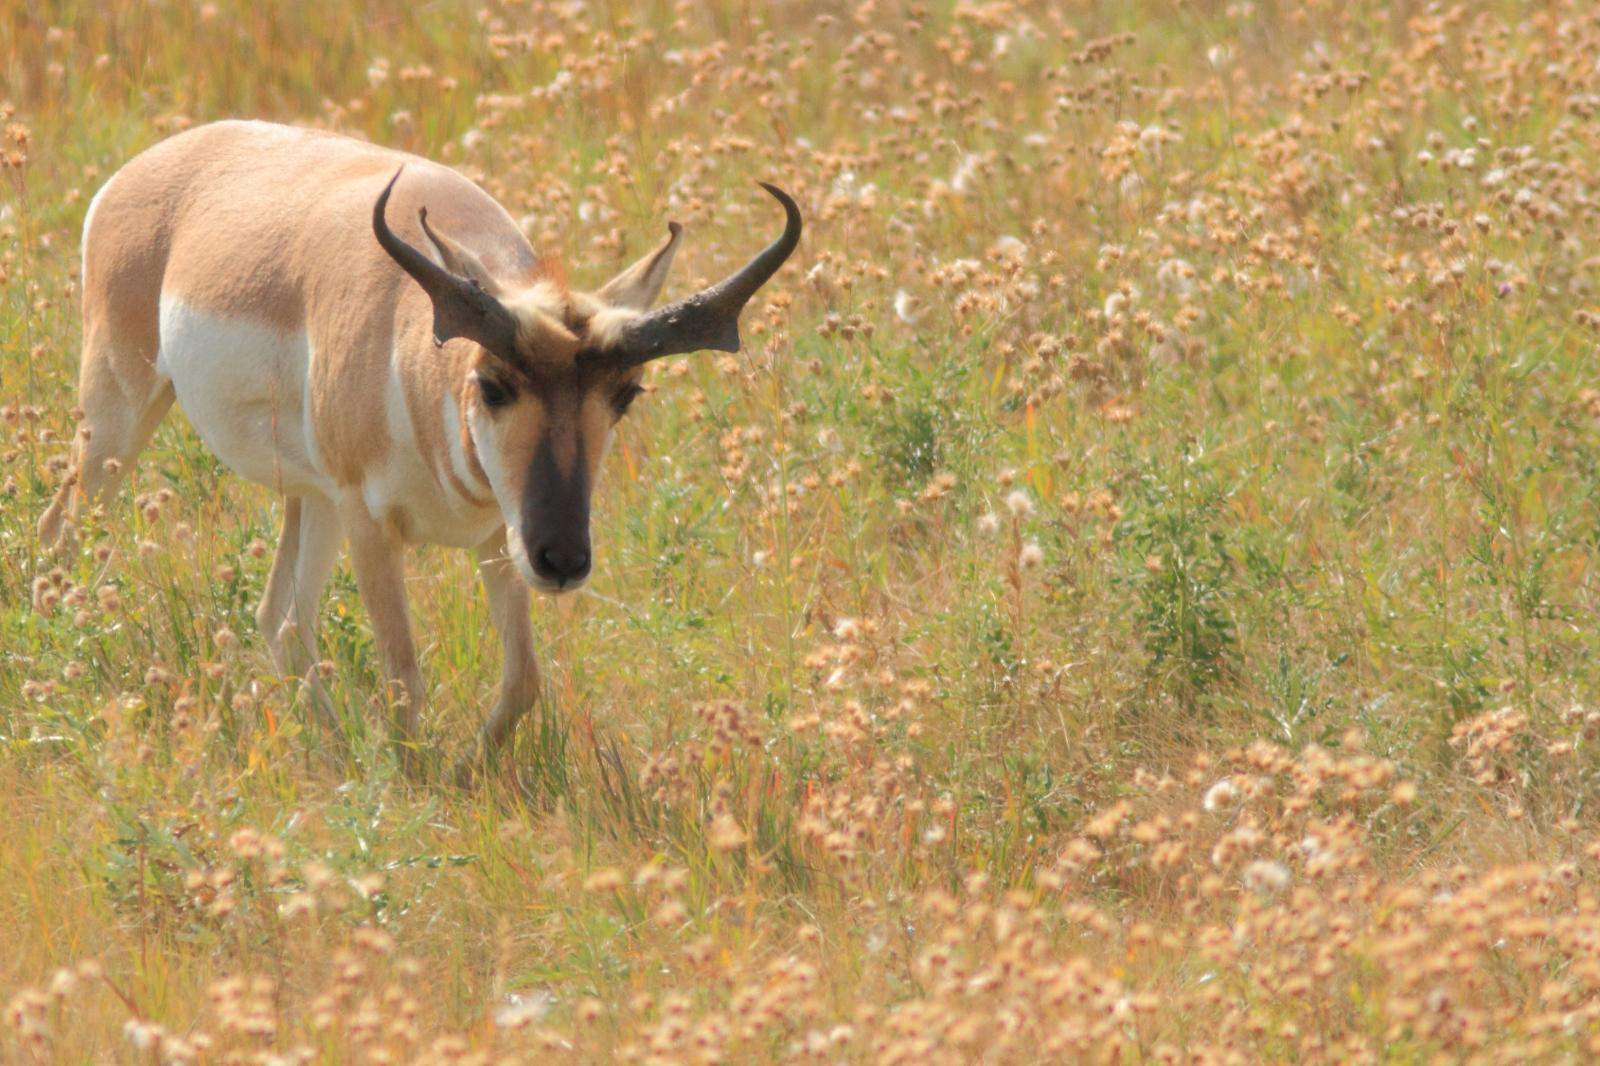

In [25]:
display(i)

In [33]:
df.head()

,category,subject_of_photo,use_of_camera,description,title,photographer,depth_of_field,composition,overall,site,...,score/1,score/2,score/3,score/4,score/5,score/6,image_url,general_impression,reviewer,color_lighting
0,underwater-photography,It's always good to do something different and...,All the advertisement I've seen and reviews I'...,NaN,25_honu,Cristina Marques,"The depth of field is good, as said before, bu...",Regarding composition and perspective I really...,7.4,http://reviews.gurushots.com/photo-critique/un...,...,9,8,6,8,6,7,http://reviews.gurushots.com/upload/img_128640...,This is a pretty good shot! I must say I was i...,Sara Constança,This is where you have a problem. The colors a...
1,wildlife-photography,Very handsome animal Mike and well placed in a...,No comments in this section all appears to be ...,The pronghorn harem buck is coming to check ou...,27_pronghorn-prowl,Mike Schilling,The shallow depth of field helps bring focused...,The composition is strong in that you have the...,8.9,http://reviews.gurushots.com/photo-critique/wi...,...,9,9,9,10,8,8,http://reviews.gurushots.com/upload/full_size_...,"This is a good shot Mike, and I would be glad ...",Mark Stadsklev,Normally this shot would be done with front li...
2,street-photography,I am a people person so kudos on the subject,It looks like you may have the knowledge of yo...,"Raw street action, Drama, Crowd emotion, Deter...",23_ozzie-london-uk-fehmi-c-mert-2014,Fehmi Cömert,Based on the aperture setting posted it gets t...,I don't think that you wanted the navel of the...,8.7,http://reviews.gurushots.com/photo-critique/st...,...,10,7,9,9,8,10,http://reviews.gurushots.com/upload/full_size_...,It is s good image Fehmi and I would like to s...,"Mike Spiegel, CPP, Cr.Photog.",I understand that the sky looks a little overc...
3,photojournalism,This is a couragious subject. I mean that home...,Love the fact your working on 200 asa. Why put...,"About a homeless in a rich city like Paris, th...",19_in-paris,Victor Estevez,"Again, focus on the homeless, F4 so my depth o...",This is a strong composition! I can see so man...,8.3,http://reviews.gurushots.com/photo-critique/ph...,...,9,7,9,7,10,8,http://reviews.gurushots.com/upload/img_129294...,"It's a great image, but you tell about a homel...",Sander de Wilde,Your use of black and white is very good. All ...
4,pet-photography,Mischief and pet antics is a great subject and...,Using a flash or light is tricky with a big sh...,Caught our cat in the act of fishing. When I t...,18_caught-in-the-act,Donna Spence,The DOP is appropriate for this image.,I like the distorted proportion of the fish bo...,8.9,http://reviews.gurushots.com/photo-critique/pe...,...,10,9,8,10,7,10,http://reviews.gurushots.com/upload/full_size_...,When I first opened this image it made me smil...,Gregory Sweeney,It looks like the flash or lighting has illumi...


1.13.0
